In [213]:
#Reference: https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from urllib2 import Request, urlopen
import json
from datetime import date, datetime
import matplotlib.dates as mdates



In [197]:
#Read JSON file as a panda's dataframe
jsonFile = "DiscordSentTweets.json"
data = pd.read_json(jsonFile)

In [244]:
data

names = []
id = []


,fullname,id,likes,replies,retweets,text,timestamp,url,user
0,Discord,586688480270557184,0,0,0,TwitchCon 2015! Discord will be there. Will yo...,2015-04-11 00:33:28,/discordapp/status/586688480270557184,discordapp
1,Discord,583438111390232576,0,0,0,LoL is the most played game on Raptr. Riot cla...,2015-04-02 01:17:40,/discordapp/status/583438111390232576,discordapp
2,Discord,579057456136892416,7,0,7,Check out my new digs (https://discordapp.com/...,2015-03-20 23:10:30,/discordapp/status/579057456136892417,discordapp
3,Discord,574016439469768704,31,6,18,It begins...!,2015-03-07 01:19:18,/discordapp/status/574016439469768704,discordapp
4,Discord,655151786693496832,5,0,2,[3/3] and @Mistmay17 @daniidesu & @Zyro_Senpai...,2015-10-16 22:42:12,/discordapp/status/655151786693496832,discordapp
5,Discord,655151241777930240,11,1,1,[2/3] Put your hands together for @camonsters ...,2015-10-16 22:40:02,/discordapp/status/655151241777930240,discordapp
6,Discord,652194830647472128,31,2,10,"Need help creating private channels, but hate ...",2015-10-08 18:52:19,/discordapp/status/652194830647472128,discordapp
7,Discord,649682440764522496,47,2,19,Discord is now integrated in the @TechnicPack ...,2015-10-01 20:28:59,/discordapp/status/649682440764522497,discordapp
8,Discord,648053569900277760,26,2,3,. @deadmau5 was so much better @TwitchConSF th...,2015-09-27 08:36:25,/discordapp/status/648053569900277760,discordapp
9,Discord,648028537694191616,33,2,4,TwitchCon after party special A-list DJ. Wonde...,2015-09-27 06:56:57,/discordapp/status/648028537694191616,discordapp


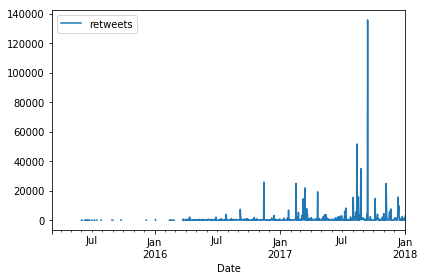

In [198]:
#Graph just retweets and timestamps
df = pd.DataFrame(data, columns = ['retweets', 'timestamp'])
df

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df
#df['2017']
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig('DiscordReTweetsAllTweets.png')

#Not sure how to show Time at (0,0)

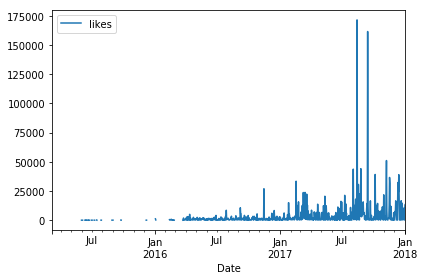

In [61]:
#Graph just likes and timestamps
df = pd.DataFrame(data, columns = ['likes', 'timestamp'])
df

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df
#df['2017']
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig('DiscordLikesAllTweets.png')

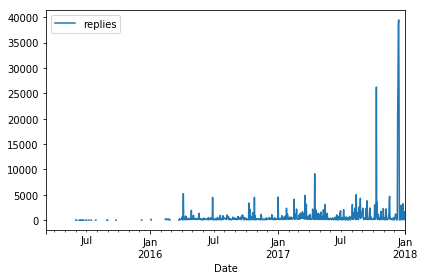

In [60]:
#Graph just replies and timestamps
df = pd.DataFrame(data, columns = ['replies', 'timestamp'])
df

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df
#df['2017']
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig('DiscordRepliesAllTweets.png')

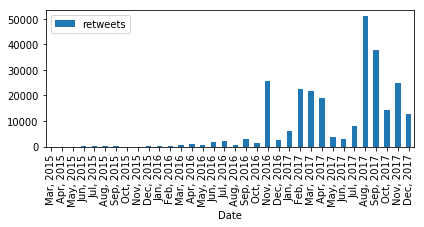

In [239]:
#Graph most engaging tweets' retweets and timestamps
df = pd.DataFrame(data, columns = ['retweets', 'timestamp'])

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).max().reset_index()
gb.columns = ["Year", "Month", "retweets"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
#Drop January
gb.drop(gb.tail(1).index,inplace=True)
gb = gb.reindex(columns=["Date", "retweets"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MostReTweetsPerMonthDiscord.png')

In [2]:
#Graph most engaging tweets' likes and timestamps
df = pd.DataFrame(data, columns = ['likes', 'timestamp'])

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).max().reset_index()
gb.columns = ["Year", "Month", "likes"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
#Drop January
gb.drop(gb.tail(1).index,inplace=True)
gb = gb.reindex(columns=["Date", "likes"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MostLikesPerMonthDiscord.png')

NameError: name 'pd' is not defined

In [248]:
#Graph most engaging tweets' replies and timestamps
df = pd.DataFrame(data, columns = ['replies', 'timestamp'])

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).max().reset_index()
gb.columns = ["Year", "Month", "replies"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
#Drop January
gb.drop(gb.tail(1).index,inplace=True)
gb = gb.reindex(columns=["Date", "replies"])
print gb

"""ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MostRepliesPerMonthDiscord.png')"""

         Date  replies
0  2015-03-01        6
1  2015-04-01        0
2  2015-05-01        1
3  2015-06-01        4
4  2015-07-01       24
5  2015-08-01       12
6  2015-09-01       15
7  2015-10-01        2
8  2015-11-01       11
9  2015-12-01       32
10 2016-01-01       60
11 2016-02-01       34
12 2016-03-01       94
13 2016-04-01     4881
14 2016-05-01     1137
15 2016-06-01     4297
16 2016-07-01      846
17 2016-08-01      822
18 2016-09-01      850
19 2016-10-01     3597
20 2016-11-01      993
21 2016-12-01      592
22 2017-01-01     4361
23 2017-02-01     2692
24 2017-03-01     3456
25 2017-04-01     8687
26 2017-05-01     2781
27 2017-06-01     1444
28 2017-07-01     1327
29 2017-08-01     4434
30 2017-09-01     2140
31 2017-10-01    26006
32 2017-11-01     2717
33 2017-12-01    15699


"ax = gb.set_index('Date').plot(kind='bar')\nplt.tight_layout()\nax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))\nretweets = ax\nretweetsImage = retweets.get_figure()\nretweetsImage.savefig('MostRepliesPerMonthDiscord.png')"